In [10]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
%matplotlib inline
from seaborn import displot, histplot
plt.style.use(['nature'])
from tqdm import tqdm
from shapely.geometry import LineString
from conflict import ConflictLyft

In [11]:
# first junction
with open('./lyft_avhv_conflict_j1.pkl', 'rb') as file:
    lyft_avhv_conflict_list1 = pickle.load(file)

with open('./lyft_hvhv_conflict_j1.pkl', 'rb') as file:
    lyft_hvhv_conflict_list1 = pickle.load(file)

lyft_conflict_list1 = lyft_avhv_conflict_list1 + lyft_hvhv_conflict_list1

# second junction
with open('./lyft_avhv_conflict_j2.pkl', 'rb') as file:
    lyft_avhv_conflict_list2 = pickle.load(file)

with open('./lyft_hvhv_conflict_j2.pkl', 'rb') as file:
    lyft_hvhv_conflict_list2 = pickle.load(file)

lyft_conflict_list2 = lyft_avhv_conflict_list2 + lyft_hvhv_conflict_list2

# report sample size
len(lyft_conflict_list1), len(lyft_conflict_list2)

(859, 886)

In [12]:
# convert the type to latest conflict object
conflict_list1 = list()
for c_index, c in enumerate(lyft_conflict_list1):
    # print(c_index)
    conflict_list1.append(ConflictLyft(
        leader_id=c.first_id,
        follower_id=c.second_id,
        leader_time_at_conflict=c.first_time_at_conflict,
        follower_time_at_conflict=c.second_time_at_conflict,
        leader_is_av=c.is_first_AV,
        follower_is_av=c.is_second_AV,
        PET=c.PET,
        conflict_type=c.category.upper(),
        leader_traj=c.first_trajectory.xy[1:-1,:],
        follower_traj=c.second_trajectory.xy[1:-1,:],
        leader_traj_timestamp=c.first_trajectory.t[1:-1],
        follower_traj_timestamp=c.second_trajectory.t[1:-1],
        leader_traj_speed=c.first_trajectory.smoothed_v,
        follower_traj_speed=c.second_trajectory.smoothed_v,
        junction_id=1,
    ))
assert len(conflict_list1) == len(lyft_conflict_list1)

conflict_list2 = list()
for c_index, c in enumerate(lyft_conflict_list2):
    # print(c_index)
    conflict_list2.append(ConflictLyft(
        leader_id=c.first_id,
        follower_id=c.second_id,
        leader_time_at_conflict=c.first_time_at_conflict,
        follower_time_at_conflict=c.second_time_at_conflict,
        leader_is_av=c.is_first_AV,
        follower_is_av=c.is_second_AV,
        PET=c.PET,
        conflict_type=c.category.upper(),
        leader_traj=c.first_trajectory.xy[1:-1,:],
        follower_traj=c.second_trajectory.xy[1:-1,:],
        leader_traj_timestamp=c.first_trajectory.t[1:-1],
        follower_traj_timestamp=c.second_trajectory.t[1:-1],
        leader_traj_speed=c.first_trajectory.smoothed_v,
        follower_traj_speed=c.second_trajectory.smoothed_v,
        junction_id=2,
    ))
assert len(conflict_list2) == len(lyft_conflict_list2)

conflict_list = conflict_list1 + conflict_list2

len(conflict_list1), len(conflict_list2)

(859, 886)

## Speed profile

In [12]:
palette = {
    "HV-HV" : '#257ab6', 
    "AV-HV" : '#31a231',
    "HV-AV" : '#ff8214',
}

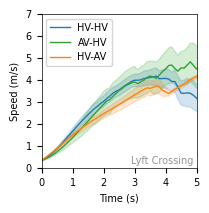

In [15]:
import seaborn as sns
import pandas as pd
v_threshold = 0.3

plt.figure(figsize=(2, 2))
df = pd.DataFrame(columns=['timestamp', 'speed', 'vehicle type'])

for index, c in enumerate(conflict_list):
    if c.conflict_type == "CROSS" and c.two_vehicles_co_exist:
        mask = c.follower_beforeConflict_speeds_followerReach > v_threshold
        reversed_mask = mask[::-1]
        first_false_index = np.where(~reversed_mask)[0]
        
        if len(first_false_index) == 0:
            result = c.follower_beforeConflict_speeds_followerReach
        else:
            last_index = len(c.follower_beforeConflict_speeds_followerReach) - first_false_index[0]
            result = c.follower_beforeConflict_speeds_followerReach[last_index:]
            timestamp = [i * 0.1 for i in range(len(result))]
            types = [c.vehicle_order for _ in range(len(result))]

            temp_df = pd.DataFrame({
                'timestamp': timestamp, 
                'speed': result, 
                'vehicle type': types,
            })
            df = pd.concat([df, temp_df])
            
sns.lineplot(df, x="timestamp", y="speed", hue="vehicle type", palette=palette, hue_order=["HV-HV", "AV-HV", "HV-AV"],)
plt.xlim([0, 5])
plt.ylim([0, 7])
plt.xlabel("Time (s)")
plt.ylabel("Speed (m/s)")
plt.text(2.9, 0.2, "Lyft Crossing", color='#949494')
plt.legend(loc=2)
plt.savefig(f"./outputs/trb/lyft_speedProfile_Cross.png", dpi=400, bbox_inches="tight")
plt.show()

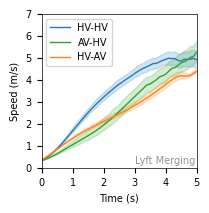

In [16]:
import seaborn as sns
import pandas as pd
v_threshold = 0.3

plt.figure(figsize=(2, 2))
df = pd.DataFrame(columns=['timestamp', 'speed', 'vehicle type'])

for index, c in enumerate(conflict_list):
    if c.conflict_type == "MERGE" and c.two_vehicles_co_exist:
        mask = c.follower_beforeConflict_speeds_followerReach > v_threshold
        reversed_mask = mask[::-1]
        first_false_index = np.where(~reversed_mask)[0]
        
        if len(first_false_index) == 0:
            result = c.follower_beforeConflict_speeds_followerReach
        else:
            last_index = len(c.follower_beforeConflict_speeds_followerReach) - first_false_index[0]
            result = c.follower_beforeConflict_speeds_followerReach[last_index:]
            timestamp = [i * 0.1 for i in range(len(result))]
            types = [c.vehicle_order for _ in range(len(result))]

            temp_df = pd.DataFrame({
                'timestamp': timestamp, 
                'speed': result, 
                'vehicle type': types,
            })
            df = pd.concat([df, temp_df])
            

    # if index == 10:
        # break

sns.lineplot(df, x="timestamp", y="speed", hue="vehicle type", palette=palette, hue_order=["HV-HV", "AV-HV", "HV-AV"],)
plt.xlim([0, 5])
plt.ylim([0, 7])
plt.xlabel("Time (s)")
plt.ylabel("Speed (m/s)")
plt.text(3, 0.2, "Lyft Merging", color='#949494')
plt.legend(loc=2)
plt.savefig(f"./outputs/trb/lyft_speedProfile_Merge.png", dpi=400, bbox_inches="tight")

waymo

In [ ]:
df = pd.read_csv("./outputs/plots/waymo_speedProfile_Cross.csv")

import seaborn as sns
import pandas as pd
v_threshold = 0.3

plt.figure(figsize=(2,2))

sns.lineplot(df, x="timestamp", y="speed", hue="vehicle type", palette=palette, hue_order=["HV-HV", "AV-HV", "HV-AV"],)
plt.xlim([0, 5])
plt.ylim([0, 7])
plt.xlabel("Time (s)")
plt.ylabel("Speed (m/s)")
plt.text(2.35, 0.2, "Waymo Crossing", color='#949494')
plt.legend(loc=2)
plt.savefig(f"./outputs/plots/waymo_speedProfile_Cross.png", dpi=400, bbox_inches="tight")


In [ ]:
df = pd.read_csv("./outputs/plots/waymo_speedProfile_Merge.csv")

import seaborn as sns
import pandas as pd
v_threshold = 0.3

plt.figure(figsize=(2,2))

sns.lineplot(df, x="timestamp", y="speed", hue="vehicle type", palette=palette, hue_order=["HV-HV", "AV-HV", "HV-AV"],)
plt.xlim([0, 5])
plt.ylim([0, 7])
plt.xlabel("Time (s)")
plt.ylabel("Speed (m/s)")
plt.text(2.35, 0.2, "Waymo Merging", color='#949494')
plt.legend(loc=2)
plt.savefig(f"./outputs/plots/waymo_speedProfile_Merge.png", dpi=400, bbox_inches="tight")

## Acceleration profile

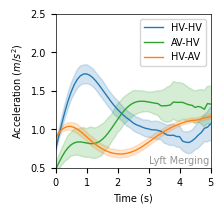

In [17]:
import seaborn as sns
import pandas as pd
v_threshold = 0.3

plt.figure(figsize=(2,2))
df = pd.DataFrame(columns=['timestamp', 'acc', 'vehicle type'])

for index, c in enumerate(conflict_list):
    if c.conflict_type == "MERGE" and c.two_vehicles_co_exist:
        mask = c.follower_beforeConflict_speeds_followerReach > v_threshold
        reversed_mask = mask[::-1]
        first_false_index = np.where(~reversed_mask)[0]
        
        if len(first_false_index) == 0:
            result = c.follower_beforeConflict_speeds_followerReach
        else:
            last_index = len(c.follower_beforeConflict_speeds_followerReach) - first_false_index[0]
            result = c.follower_beforeConflict_speeds_followerReach[last_index:]
            result = np.diff(result) / 0.1
            timestamp = [i * 0.1 for i in range(len(result))]
            types = [c.vehicle_order for _ in range(len(result))]

            temp_df = pd.DataFrame({
                'timestamp': timestamp, 
                'acc': result, 
                'vehicle type': types,
            })
            df = pd.concat([df, temp_df])

sns.lineplot(df, x="timestamp", y="acc", hue="vehicle type", palette=palette, hue_order=["HV-HV", "AV-HV", "HV-AV"],)
plt.xlim([0, 5])
plt.ylim([0.5, 2.5])
plt.xlabel("Time (s)")
plt.ylabel("Acceleration ($m/s^2$)")
plt.text(3.0, 0.55, "Lyft Merging", color='#949494')
plt.legend(loc=0)
plt.savefig(f"./outputs/trb/acc_lyft_merge.jpg", dpi=400, bbox_inches="tight")
# df.to_csv("waymo_speedProfile_Merge.csv")

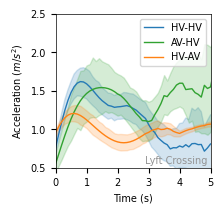

In [18]:
import seaborn as sns
import pandas as pd
v_threshold = 0.3

plt.figure(figsize=(2,2))
df = pd.DataFrame(columns=['timestamp', 'acc', 'vehicle type'])

for index, c in enumerate(conflict_list):
    if c.conflict_type == "CROSS" and c.two_vehicles_co_exist:
        mask = c.follower_beforeConflict_speeds_followerReach > v_threshold
        reversed_mask = mask[::-1]
        first_false_index = np.where(~reversed_mask)[0]
        
        if len(first_false_index) == 0:
            result = c.follower_beforeConflict_speeds_followerReach
        else:
            last_index = len(c.follower_beforeConflict_speeds_followerReach) - first_false_index[0]
            result = c.follower_beforeConflict_speeds_followerReach[last_index:]
            result = np.diff(result) / 0.1
            timestamp = [i * 0.1 for i in range(len(result))]
            types = [c.vehicle_order for _ in range(len(result))]

            temp_df = pd.DataFrame({
                'timestamp': timestamp, 
                'acc': result, 
                'vehicle type': types,
            })
            df = pd.concat([df, temp_df])

sns.lineplot(df, x="timestamp", y="acc", hue="vehicle type", palette=palette, hue_order=["HV-HV", "AV-HV", "HV-AV"],)
plt.xlim([0, 5])
plt.ylim([0.5, 2.5])
plt.xlabel("Time (s)")
plt.ylabel("Acceleration ($m/s^2$)")
plt.text(2.9, 0.55, "Lyft Crossing", color='#949494')
plt.legend(loc=1)
plt.savefig(f"./outputs/trb/acc_lyft_cross.jpg", dpi=400, bbox_inches="tight")
# df.to_csv("waymo_speedProfile_Merge.csv")

## Stats Test

In [13]:
# Import necessary library for statistical analysis
from scipy.stats import ttest_ind, f_oneway, mannwhitneyu, shapiro
import pandas as pd
import numpy as np

# Define the color palette
palette = {
    "HV-HV": '#257ab6',  # Blue
    "AV-HV": '#31a231',  # Green
    "HV-AV": '#ff8214',  # Orange
}

# Threshold for speed filtering
v_threshold = 0.3

# DataFrames to hold results
df_speed_cross = pd.DataFrame(columns=['average_speed', 'vehicle_type'])
df_acc_cross = pd.DataFrame(columns=['average_acceleration', 'vehicle_type'])
df_speed_merge = pd.DataFrame(columns=['average_speed', 'vehicle_type'])
df_acc_merge = pd.DataFrame(columns=['average_acceleration', 'vehicle_type'])

# Loop through conflicts to calculate average speed and acceleration
for index, c in enumerate(conflict_list):
    # Check if both vehicles exist and PET condition
    if c.two_vehicles_co_exist:
        # Process for CROSS conflicts
        if c.conflict_type == "CROSS":
            # Calculate average speed for CROSS
            mask = c.follower_beforeConflict_speeds_followerReach > v_threshold
            reversed_mask = mask[::-1]
            first_false_index = np.where(~reversed_mask)[0]

            if len(first_false_index) == 0:
                speed_result = c.follower_beforeConflict_speeds_followerReach
            else:
                last_index = len(c.follower_beforeConflict_speeds_followerReach) - first_false_index[0]
                speed_result = c.follower_beforeConflict_speeds_followerReach[last_index:]

            average_speed = np.mean(speed_result)
            temp_speed_df = pd.DataFrame({'average_speed': [average_speed], 'vehicle_type': [c.vehicle_order]})
            df_speed_cross = pd.concat([df_speed_cross, temp_speed_df], ignore_index=True)
            
            # Calculate average acceleration for CROSS
            acc_result = np.diff(speed_result) / 0.1
            average_acceleration = np.mean(acc_result)
            temp_acc_df = pd.DataFrame({'average_acceleration': [average_acceleration], 'vehicle_type': [c.vehicle_order]})
            df_acc_cross = pd.concat([df_acc_cross, temp_acc_df], ignore_index=True)

        # Process for MERGE conflicts
        if c.conflict_type == "MERGE":
            # Calculate average speed for MERGE
            mask = c.follower_beforeConflict_speeds_followerReach > v_threshold
            reversed_mask = mask[::-1]
            first_false_index = np.where(~reversed_mask)[0]

            if len(first_false_index) == 0:
                speed_result = c.follower_beforeConflict_speeds_followerReach
            else:
                last_index = len(c.follower_beforeConflict_speeds_followerReach) - first_false_index[0]
                speed_result = c.follower_beforeConflict_speeds_followerReach[last_index:]

            average_speed = np.mean(speed_result)
            temp_speed_df = pd.DataFrame({'average_speed': [average_speed], 'vehicle_type': [c.vehicle_order]})
            df_speed_merge = pd.concat([df_speed_merge, temp_speed_df], ignore_index=True)
            
            # Calculate average acceleration for MERGE
            acc_result = np.diff(speed_result) / 0.1
            average_acceleration = np.mean(acc_result)
            temp_acc_df = pd.DataFrame({'average_acceleration': [average_acceleration], 'vehicle_type': [c.vehicle_order]})
            df_acc_merge = pd.concat([df_acc_merge, temp_acc_df], ignore_index=True)

C:\Users\Gavin\.conda\envs\lyft\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Gavin\.conda\envs\lyft\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [5]:
df_speed_cross.to_csv("./outputs/trb/lyft_cross_vel.csv", index=False)
df_speed_merge.to_csv("./outputs/trb/lyft_merge_vel.csv", index=False)
df_acc_cross.to_csv("./outputs/trb/lyft_cross_acc.csv", index=False)
df_acc_merge.to_csv("./outputs/trb/lyft_merge_acc.csv", index=False)

In [14]:
# Calculate mean and variance for each scenario and vehicle type

# Crossing Speeds
mean_speed_hv_hv_cross = df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-HV']['average_speed'].mean()
var_speed_hv_hv_cross = df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-HV']['average_speed'].var()

mean_speed_av_hv_cross = df_speed_cross[df_speed_cross['vehicle_type'] == 'AV-HV']['average_speed'].mean()
var_speed_av_hv_cross = df_speed_cross[df_speed_cross['vehicle_type'] == 'AV-HV']['average_speed'].var()

mean_speed_hv_av_cross = df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-AV']['average_speed'].mean()
var_speed_hv_av_cross = df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-AV']['average_speed'].var()

# Merging Speeds
mean_speed_hv_hv_merge = df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-HV']['average_speed'].mean()
var_speed_hv_hv_merge = df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-HV']['average_speed'].var()

mean_speed_av_hv_merge = df_speed_merge[df_speed_merge['vehicle_type'] == 'AV-HV']['average_speed'].mean()
var_speed_av_hv_merge = df_speed_merge[df_speed_merge['vehicle_type'] == 'AV-HV']['average_speed'].var()

mean_speed_hv_av_merge = df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-AV']['average_speed'].mean()
var_speed_hv_av_merge = df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-AV']['average_speed'].var()

# Crossing Accelerations
mean_acc_hv_hv_cross = df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-HV']['average_acceleration'].mean()
var_acc_hv_hv_cross = df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-HV']['average_acceleration'].var()

mean_acc_av_hv_cross = df_acc_cross[df_acc_cross['vehicle_type'] == 'AV-HV']['average_acceleration'].mean()
var_acc_av_hv_cross = df_acc_cross[df_acc_cross['vehicle_type'] == 'AV-HV']['average_acceleration'].var()

mean_acc_hv_av_cross = df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-AV']['average_acceleration'].mean()
var_acc_hv_av_cross = df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-AV']['average_acceleration'].var()

# Merging Accelerations
mean_acc_hv_hv_merge = df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-HV']['average_acceleration'].mean()
var_acc_hv_hv_merge = df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-HV']['average_acceleration'].var()

mean_acc_av_hv_merge = df_acc_merge[df_acc_merge['vehicle_type'] == 'AV-HV']['average_acceleration'].mean()
var_acc_av_hv_merge = df_acc_merge[df_acc_merge['vehicle_type'] == 'AV-HV']['average_acceleration'].var()

mean_acc_hv_av_merge = df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-AV']['average_acceleration'].mean()
var_acc_hv_av_merge = df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-AV']['average_acceleration'].var()

In [15]:
df_speed_merge.dropna(inplace=True)
df_acc_merge.dropna(inplace=True)

### Normality Test

In [61]:
# HVHV cross
shapiro(df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-HV']['average_speed']).pvalue

1.1855026523313549e-20

In [62]:
# AVHV cross
shapiro(df_speed_cross[df_speed_cross['vehicle_type'] == 'AV-HV']['average_speed']).pvalue

3.8430043787229806e-05

In [63]:
# HVAV cross
shapiro(df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-AV']['average_speed']).pvalue

1.8609633606114567e-15

In [65]:
# HVHV merge
shapiro(df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-HV']['average_speed']).pvalue

3.61165602380949e-20

In [66]:
# AVHV merge
shapiro(df_speed_merge[df_speed_merge['vehicle_type'] == 'AV-HV']['average_speed']).pvalue

1.0

In [67]:
# HVAV merge
shapiro(df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-AV']['average_speed']).pvalue

1.0

In [69]:
# Acceleration

In [68]:
# HVHV cross
shapiro(df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-HV']['average_acceleration']).pvalue

0.0005421481328085065

In [70]:
# AVHV cross
shapiro(df_acc_cross[df_acc_cross['vehicle_type'] == 'AV-HV']['average_acceleration']).pvalue

0.08118756115436554

In [71]:
# HVAV cross
shapiro(df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-AV']['average_acceleration']).pvalue

2.2640115476812994e-11

In [73]:
# HVHV merge
shapiro(df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-HV']['average_acceleration']).pvalue

9.975751709134784e-06

In [74]:
# AVHV merge
shapiro(df_acc_merge[df_acc_merge['vehicle_type'] == 'AV-HV']['average_acceleration']).pvalue

1.0

In [75]:
# HVAV merge
shapiro(df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-AV']['average_acceleration']).pvalue

1.0

### Mann-Whitney U Test

In [17]:
#---- speed -----#
# HVHV::AVHV cross
mannwhitneyu(
    df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-HV']['average_speed'],
    df_speed_cross[df_speed_cross['vehicle_type'] == 'AV-HV']['average_speed'],
).pvalue # 0.4023102325441612

# HVHV::HVAV cross
mannwhitneyu(
    df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-HV']['average_speed'],
    df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-AV']['average_speed']
).pvalue # 5.500951973185261e-07

# AVHV::HVAV cross
mannwhitneyu(
    df_speed_cross[df_speed_cross['vehicle_type'] == 'AV-HV']['average_speed'],
    df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-AV']['average_speed']
).pvalue # 2.477728840686374e-05

# HVHV::AVHV merge
mannwhitneyu(
    df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-HV']['average_speed'],
    df_speed_merge[df_speed_merge['vehicle_type'] == 'AV-HV']['average_speed'],
).pvalue # 0.2247086905699881

# HVHV::HVAV merge
mannwhitneyu(
    df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-HV']['average_speed'],
    df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-AV']['average_speed']
).pvalue # 1.085666963181627e-08

# AVHV::HVAV merge
mannwhitneyu(
    df_speed_merge[df_speed_merge['vehicle_type'] == 'AV-HV']['average_speed'],
    df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-AV']['average_speed']
).pvalue # 1.913818114333219e-05

1.913818114333219e-05

In [20]:
#----- acc -----#
# HVHV::AVHV cross
mannwhitneyu(
    df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-HV']['average_acceleration'],
    df_acc_cross[df_acc_cross['vehicle_type'] == 'AV-HV']['average_acceleration'],
).pvalue # 0.05856934269642199

# HVHV::HVAV cross
mannwhitneyu(
    df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-HV']['average_acceleration'],
    df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-AV']['average_acceleration']
).pvalue # 2.9107423964283866e-07

# AVHV::HVAV cross
mannwhitneyu(
    df_acc_cross[df_acc_cross['vehicle_type'] == 'AV-HV']['average_acceleration'],
    df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-AV']['average_acceleration']
).pvalue # 0.6078273928728375

# HVHV::AVHV merge
mannwhitneyu(
    df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-HV']['average_acceleration'],
    df_acc_merge[df_acc_merge['vehicle_type'] == 'AV-HV']['average_acceleration'],
).pvalue # 0.25603504049474946

# HVHV::HVAV merge
mannwhitneyu(
    df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-HV']['average_acceleration'],
    df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-AV']['average_acceleration']
).pvalue # 2.3807397533474027e-17

# AVHV::HVAV merge
mannwhitneyu(
    df_acc_merge[df_acc_merge['vehicle_type'] == 'AV-HV']['average_acceleration'],
    df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-AV']['average_acceleration']
).pvalue # 5.765201318248143e-08

5.765201318248143e-08

### T-Test

In [23]:
#---- speed -----#
# HVHV::AVHV cross
ttest_ind(
    df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-HV']['average_speed'],
    df_speed_cross[df_speed_cross['vehicle_type'] == 'AV-HV']['average_speed'],
).pvalue # 0.375484500104893

# HVHV::HVAV cross
ttest_ind(
    df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-HV']['average_speed'],
    df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-AV']['average_speed']
).pvalue # 0.0004906095493061557

# AVHV::HVAV cross
ttest_ind(
    df_speed_cross[df_speed_cross['vehicle_type'] == 'AV-HV']['average_speed'],
    df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-AV']['average_speed']
).pvalue # 0.00043893089366563864

# HVHV::AVHV merge
ttest_ind(
    df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-HV']['average_speed'],
    df_speed_merge[df_speed_merge['vehicle_type'] == 'AV-HV']['average_speed'],
).pvalue # 0.054218615938421026

# HVHV::HVAV merge
ttest_ind(
    df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-HV']['average_speed'],
    df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-AV']['average_speed']
).pvalue # 3.810551679352431e-09


# AVHV::HVAV merge
ttest_ind(
    df_speed_merge[df_speed_merge['vehicle_type'] == 'AV-HV']['average_speed'],
    df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-AV']['average_speed']
).pvalue # 1.936921980773114e-11

1.936921980773114e-11

In [26]:
#----- acc -----#
# HVHV::AVHV cross
ttest_ind(
    df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-HV']['average_acceleration'],
    df_acc_cross[df_acc_cross['vehicle_type'] == 'AV-HV']['average_acceleration'],
).pvalue # 0.09930287688417751

# HVHV::HVAV cross
ttest_ind(
    df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-HV']['average_acceleration'],
    df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-AV']['average_acceleration']
).pvalue # 1.7556993488553983e-05

# AVHV::HVAV cross
ttest_ind(
    df_acc_cross[df_acc_cross['vehicle_type'] == 'AV-HV']['average_acceleration'],
    df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-AV']['average_acceleration']
).pvalue # 0.07309662927514265

# HVHV::AVHV merge
ttest_ind(
    df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-HV']['average_acceleration'],
    df_acc_merge[df_acc_merge['vehicle_type'] == 'AV-HV']['average_acceleration'],
).pvalue # 0.23208825336435404

# HVHV::HVAV merge
ttest_ind(
    df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-HV']['average_acceleration'],
    df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-AV']['average_acceleration']
).pvalue # 1.2926822099120658e-15

# AVHV::HVAV merge
ttest_ind(
    df_acc_merge[df_acc_merge['vehicle_type'] == 'AV-HV']['average_acceleration'],
    df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-AV']['average_acceleration']
).pvalue # 1.0086353743418747e-17

1.0086353743418747e-17

### ANOVA

In [28]:
# Speed | Cross 
f_oneway(
    df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-HV']['average_speed'],
    df_speed_cross[df_speed_cross['vehicle_type'] == 'AV-HV']['average_speed'],
    df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-AV']['average_speed']
).pvalue # 0.0007254538798330937

# Speed | Merge
f_oneway(
    df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-HV']['average_speed'],
    df_speed_merge[df_speed_merge['vehicle_type'] == 'AV-HV']['average_speed'],
    df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-AV']['average_speed'],
).pvalue # 4.899091403964781e-10

# Acceleration | Cross
f_oneway(
    df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-HV']['average_acceleration'],
    df_acc_cross[df_acc_cross['vehicle_type'] == 'AV-HV']['average_acceleration'],
    df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-AV']['average_acceleration']
).pvalue # 8.262673391903797e-05

# Acceleration | Merge
f_oneway(
    df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-HV']['average_acceleration'],
    df_acc_merge[df_acc_merge['vehicle_type'] == 'AV-HV']['average_acceleration'],
    df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-AV']['average_acceleration']
).pvalue # 4.1491762790097053e-16

4.1491762790097053e-16

### Visualization

In [81]:
# # Plotting average speed histogram for Crossing
# plt.figure(figsize=(8, 4))
# sns.histplot(df_speed_cross, x='average_speed', hue='vehicle_type', bins=30, palette=palette, kde=True)
# plt.title('Histogram of Average Speeds (Crossing)')
# plt.xlabel('Average Speed (m/s)')
# plt.ylabel('Frequency')
# plt.legend(title='Vehicle Type', labels=['HV-HV', 'AV-HV', 'HV-AV'])
# plt.tight_layout()
# plt.show()

# # Plotting average acceleration histogram for Crossing
# plt.figure(figsize=(8, 4))
# sns.histplot(df_acc_cross, x='average_acceleration', hue='vehicle_type', bins=30, palette=palette, kde=True)
# plt.title('Histogram of Average Accelerations (Crossing)')
# plt.xlabel('Average Acceleration (m/s²)')
# plt.ylabel('Frequency')
# plt.legend(title='Vehicle Type', labels=['HV-HV', 'AV-HV', 'HV-AV'])
# plt.tight_layout()
# plt.show()

# # Plotting average speed histogram for Merging
# plt.figure(figsize=(8, 4))
# sns.histplot(df_speed_merge, x='average_speed', hue='vehicle_type', bins=30, palette=palette, kde=True)
# plt.title('Histogram of Average Speeds (Merging)')
# plt.xlabel('Average Speed (m/s)')
# plt.ylabel('Frequency')
# plt.legend(title='Vehicle Type', labels=['HV-HV', 'AV-HV', 'HV-AV'])
# plt.tight_layout()
# plt.show()

# # Plotting average acceleration histogram for Merging
# plt.figure(figsize=(8, 4))
# sns.histplot(df_acc_merge, x='average_acceleration', hue='vehicle_type', bins=30, palette=palette, kde=True)
# plt.title('Histogram of Average Accelerations (Merging)')
# plt.xlabel('Average Acceleration (m/s²)')
# plt.ylabel('Frequency')
# plt.legend(title='Vehicle Type', labels=['HV-HV', 'AV-HV', 'HV-AV'])
# plt.tight_layout()
# plt.show()

# # Performing t-tests for average speeds in Crossing
# t_stat_speed_av_hv_cross, p_value_speed_av_hv_cross = ttest_ind(
#     df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-HV']['average_speed'],
#     df_speed_cross[df_speed_cross['vehicle_type'] == 'AV-HV']['average_speed'],
#     equal_var=False
# )
# t_stat_speed_hv_av_cross, p_value_speed_hv_av_cross = ttest_ind(
#     df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-HV']['average_speed'],
#     df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-AV']['average_speed'],
#     equal_var=False
# )

# # Performing t-tests for average accelerations in Crossing
# t_stat_acc_av_hv_cross, p_value_acc_av_hv_cross = ttest_ind(
#     df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-HV']['average_acceleration'],
#     df_acc_cross[df_acc_cross['vehicle_type'] == 'AV-HV']['average_acceleration'],
#     equal_var=False
# )
# t_stat_acc_hv_av_cross, p_value_acc_hv_av_cross = ttest_ind(
#     df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-HV']['average_acceleration'],
#     df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-AV']['average_acceleration'],
#     equal_var=False
# )

# # Performing t-tests for average speeds in Merging
# t_stat_speed_av_hv_merge, p_value_speed_av_hv_merge = ttest_ind(
#     df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-HV']['average_speed'],
#     df_speed_merge[df_speed_merge['vehicle_type'] == 'AV-HV']['average_speed'],
#     equal_var=False
# )
# t_stat_speed_hv_av_merge, p_value_speed_hv_av_merge = ttest_ind(
#     df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-HV']['average_speed'],
#     df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-AV']['average_speed'],
#     equal_var=False
# )

# # Performing t-tests for average accelerations in Merging
# t_stat_acc_av_hv_merge, p_value_acc_av_hv_merge = ttest_ind(
#     df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-HV']['average_acceleration'],
#     df_acc_merge[df_acc_merge['vehicle_type'] == 'AV-HV']['average_acceleration'],
#     equal_var=False
# )
# t_stat_acc_hv_av_merge, p_value_acc_hv_av_merge = ttest_ind(
#     df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-HV']['average_acceleration'],
#     df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-AV']['average_acceleration'],
#     equal_var=False
# )

# # Print the calculated means, variances, and t-test results

print("Average Speed Analysis for Crossing:")
print(f"HV-HV: Mean = {mean_speed_hv_hv_cross:.3f}, Variance = {var_speed_hv_hv_cross:.3f}")
print(f"AV-HV: Mean = {mean_speed_av_hv_cross:.3f}, Variance = {var_speed_av_hv_cross:.3f}")
print(f"HV-AV: Mean = {mean_speed_hv_av_cross:.3f}, Variance = {var_speed_hv_av_cross:.3f}\n")

# print("T-test Results for Average Speeds (Crossing):")
# print(f"HV-HV vs. AV-HV: t-statistic = {t_stat_speed_av_hv_cross:.3f}, p-value = {p_value_speed_av_hv_cross:.3f}")
# print(f"HV-HV vs. HV-AV: t-statistic = {t_stat_speed_hv_av_cross:.3f}, p-value = {p_value_speed_hv_av_cross:.3f}\n")

print("Average Acceleration Analysis for Crossing:")
print(f"HV-HV: Mean = {mean_acc_hv_hv_cross:.3f}, Variance = {var_acc_hv_hv_cross:.3f}")
print(f"AV-HV: Mean = {mean_acc_av_hv_cross:.3f}, Variance = {var_acc_av_hv_cross:.3f}")
print(f"HV-AV: Mean = {mean_acc_hv_av_cross:.3f}, Variance = {var_acc_hv_av_cross:.3f}\n")

# print("T-test Results for Average Accelerations (Crossing):")
# print(f"HV-HV vs. AV-HV: t-statistic = {t_stat_acc_av_hv_cross:.3f}, p-value = {p_value_acc_av_hv_cross:.3f}")
# print(f"HV-HV vs. HV-AV: t-statistic = {t_stat_acc_hv_av_cross:.3f}, p-value = {p_value_acc_hv_av_cross:.3f}\n")

print("Average Speed Analysis for Merging:")
print(f"HV-HV: Mean = {mean_speed_hv_hv_merge:.3f}, Variance = {var_speed_hv_hv_merge:.3f}")
print(f"AV-HV: Mean = {mean_speed_av_hv_merge:.3f}, Variance = {var_speed_av_hv_merge:.3f}")
print(f"HV-AV: Mean = {mean_speed_hv_av_merge:.3f}, Variance = {var_speed_hv_av_merge:.3f}\n")

# print("T-test Results for Average Speeds (Merging):")
# print(f"HV-HV vs. AV-HV: t-statistic = {t_stat_speed_av_hv_merge:.3f}, p-value = {p_value_speed_av_hv_merge:.3f}")
# print(f"HV-HV vs. HV-AV: t-statistic = {t_stat_speed_hv_av_merge:.3f}, p-value = {p_value_speed_hv_av_merge:.3f}\n")

print("Average Acceleration Analysis for Merging:")
print(f"HV-HV: Mean = {mean_acc_hv_hv_merge:.3f}, Variance = {var_acc_hv_hv_merge:.3f}")
print(f"AV-HV: Mean = {mean_acc_av_hv_merge:.3f}, Variance = {var_acc_av_hv_merge:.3f}")
print(f"HV-AV: Mean = {mean_acc_hv_av_merge:.3f}, Variance = {var_acc_hv_av_merge:.3f}\n")

# print("T-test Results for Average Accelerations (Merging):")
# print(f"HV-HV vs. AV-HV: t-statistic = {t_stat_acc_av_hv_merge:.3f}, p-value = {p_value_acc_av_hv_merge:.3f}")
# print(f"HV-HV vs. HV-AV: t-statistic = {t_stat_acc_hv_av_merge:.3f}, p-value = {p_value_acc_hv_av_merge:.3f}")

Average Speed Analysis for Crossing:
HV-HV: Mean = 3.512, Variance = 2.786
AV-HV: Mean = 3.715, Variance = 2.746
HV-AV: Mean = 2.856, Variance = 1.715

Average Acceleration Analysis for Crossing:
HV-HV: Mean = 0.647, Variance = 0.662
AV-HV: Mean = 0.834, Variance = 0.764
HV-AV: Mean = 1.028, Variance = 0.210

Average Speed Analysis for Merging:
HV-HV: Mean = 3.659, Variance = 1.755
AV-HV: Mean = 3.902, Variance = 2.255
HV-AV: Mean = 3.069, Variance = 0.347

Average Acceleration Analysis for Merging:
HV-HV: Mean = 0.572, Variance = 0.488
AV-HV: Mean = 0.494, Variance = 0.477
HV-AV: Mean = 0.995, Variance = 0.073

